# Simple example of Normalization for regression

In [69]:
import numpy as np
from numpy.linalg import pinv #pseudo Inverse

file_path = 'data/house_price.txt' # Reading data from a file
data = np.loadtxt(file_path, delimiter=',')

x = data[: , 0]
idx = np.argsort(x)
X = np.zeros((41,2))
X[: , 0] =  1
X[: , 1] =  x[idx] # Creating Feature Matrix
#print(X)
y= data[: , 1]
Y = np.zeros((41,1))
Y[: , 0] =  y[idx]

tetha = np.zeros((2,1))

tetha = pinv(X)@Y # calculating Tetha using Normalization
print(tetha)
Z = X @ tetha
z = Z[: , 0]


[[988.29469769]
 [  1.16287707]]


# Ploting Data and Regression

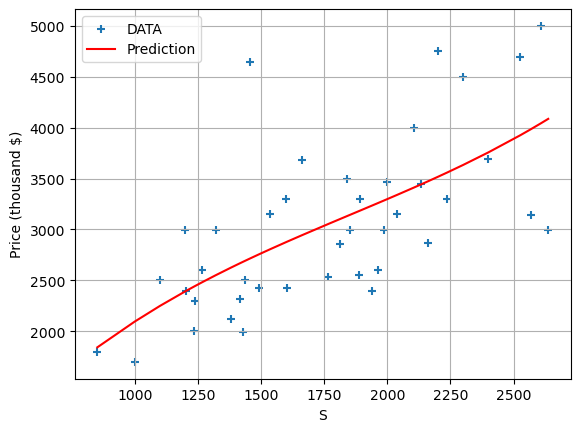

In [105]:
import matplotlib.pyplot as plt

plt.scatter(x, y, marker='+', label='DATA' )
plt.plot(X[: , 1], z, color ='r', label='Prediction')
plt.legend()
plt.grid()
plt.xlabel('S')
plt.ylabel('Price (thousand $)')
plt.show()



[[-4.28512781e+02]
 [ 3.70007169e+00]
 [-1.43456669e-03]
 [ 2.58125741e-07]]


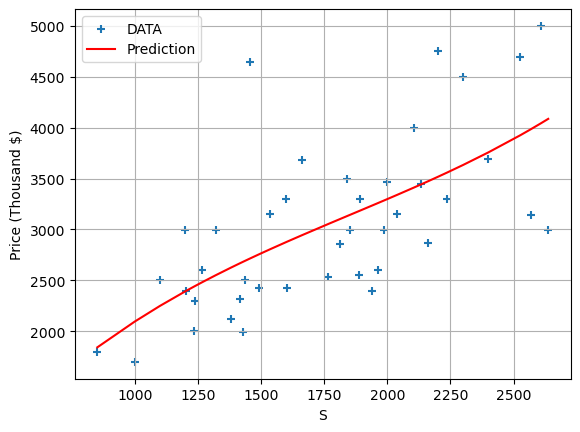

In [104]:
x = data[: , 0]
idx = np.argsort(x)
X = np.zeros((41,4))
X[: , 0] =  1
X[: , 1] =  x[idx]
X[: , 2] =  (x[idx]**2)
X[: , 3] =  (x[idx]**3) # Creating Feature Matrix

y= data[: , 1]
Y = np.zeros((41,1))
Y[: , 0] =  y[idx]

tetha = np.zeros((4,1))

tetha = pinv(X)@Y # calculating Tetha using Normalization
print(tetha)
Z = X @ tetha
z = Z[: , 0]

plt.scatter(x, y, marker='+', label='DATA' )
plt.plot(X[: , 1], z, color ='r', label='Prediction')
plt.legend()
plt.grid()
plt.xlabel('S')
plt.ylabel('Price (thousand $)')
plt.show()

# Using Robust locally weighted regression technique

In [95]:
import math

def lowess(x, y, f=2. / 3., iter=3):
    """Robust locally weighted regression.

    Inputs:
       - x, y: dataset
       - f: smoothing parameter
       - iter: number of robustifying iterations
    """
    n = len(x)

    r = int(math.ceil(f * n))

    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]

    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    
    y_pred = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]])
            beta = np.linalg.solve(A, b)
            y_pred[i] = beta[0] + beta[1] * x[i]

        residuals = y - y_pred
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return y_pred

def load_house_dataset(filename='data/house_price.txt', delimiter=','):
    data = np.genfromtxt(filename, delimiter=delimiter)
    x, y = data[:, 0], data[:, 1]
    return x, y

In [109]:
from ipywidgets import interact

def lwr_plt(f):
    x, y = load_house_dataset()
    idx = np.argsort(x)
    x, y = x[idx], y[idx]

    z = lowess(x, y, f, 3)

    plt.scatter(x, y, marker='+', label='DATA' )
    plt.plot(x, z, color ='r', label='Prediction')
    plt.legend()
    plt.grid()
    plt.xlabel('S')
    plt.ylabel('Price (thousand $)')
    plt.show()

interact(lwr_plt, f = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

interactive(children=(Dropdown(description='f', options=(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9), value=0…

<function __main__.lwr_plt(f)>

# Using Gradient Descent

In [143]:
def predicting(tetha_0, tetha_1, x):
    predicted_y = tetha_0 + (tetha_1 * x)
    return predicted_y

def mse(y , predicted_y):
    norm2_e = 0.5 * ((predicted_y - y)**2).mean()
    return norm2_e

def search_optimum_tetha(retries, alpha, Normalized_x, y):

    tetha_0 = np.random.rand()
    tetha_1 = np.random.rand()
    try_no = 0
    try_mse = np.zeros((retries,2))

    while(retries):
        retries -= 1
        try_no += 1
        y_pred = predicting(tetha_0, tetha_1, Normalized_x)
        #print("attemp %4d -> MSE = %4f"  %(try_no, mse(y , y_pred)))
        #mean_score_erro = mse(y , y_pred)
        try_mse[try_no-1,0] =  try_no
        try_mse[try_no-1,1] =  mse(y , y_pred)

        dtetha_0 = y_pred - y
        dtetha_1 = Normalized_x * dtetha_0

        tetha_0 -= alpha * dtetha_0.mean()
        tetha_1 -= alpha * dtetha_1.mean()

    return y_pred, try_mse





In [144]:
from ipywidgets import interact

def gdm_plt(retries, alpha):
    file_path = 'data/house_price.txt' # Reading data from a file
    data = np.loadtxt(file_path, delimiter=',')

    x = data[: , 0]
    y = data[: , 1]

    mu = x.mean()
    sigma = x.std()
    Normalized_x = (x - mu) / sigma

    z, minscoeerror = search_optimum_tetha(retries, alpha, Normalized_x, y)

    

    plt.scatter(Normalized_x, y, marker='+', label='DATA' )
    plt.plot(Normalized_x, z, color ='r', label='Prediction')
    plt.legend()
    plt.grid()
    plt.xlabel('S')
    plt.ylabel('Price (thousand $)')
    plt.show()

    
    plt.plot(minscoeerror[: , 0], minscoeerror[: , 1], color ='r', label='Prediction')
    plt.legend()
    plt.grid()
    plt.xlabel('Try No')
    plt.ylabel('MSE')
    plt.show()

interact(gdm_plt, retries = [500, 1000, 2000, 4000], alpha = [5e-4, 5e-3, 5e-2])

interactive(children=(Dropdown(description='retries', options=(500, 1000, 2000, 4000), value=500), Dropdown(de…

<function __main__.gdm_plt(retries, alpha)>